In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier#KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt


In [88]:
# load data
churnData = pd.DataFrame(pd.read_csv('Data\DATA_Customer-Churn.csv'))
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [89]:
# get insight of data
df_describe = pd.DataFrame({"% NaN" : round(churnData.isna().sum()/len(churnData),4)*100, "% 0.0" : round(churnData[churnData == 0].count(axis=0)/len(churnData.index)* 100,2)}).transpose()
df_describe.append(churnData.describe(include='all')).transpose()

,% NaN,% 0.0,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,0.0,0.0,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,0.0,83.79,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,0.0,0.0,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,0.0,0.0,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,0.0,0.16,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,0.0,0.0,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,0.0,0.0,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,0.0,0.0,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceProtection,0.0,0.0,7043,3,No,3095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TechSupport,0.0,0.0,7043,3,No,3473,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
for i in churnData.columns:
    if len(churnData[i].value_counts()) <4 :
        print(churnData[i].value_counts())
        print(churnData[i].describe())
    else:
        print(churnData[i].value_counts().iloc[:3])
        print(churnData[i].describe())

Male      3555
Female    3488
Name: gender, dtype: int64
count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
No     3641
Yes    3402
Name: Partner, dtype: int64
count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object
No     4933
Yes    2110
Name: Dependents, dtype: int64
count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object
1     613
72    362
2     238
Name: tenure, dtype: int64
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
Yes    6361
No      682
Name: PhoneService, dtype: int6

In [91]:
# strip space and make it numeric.
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'].replace(" ",""))

In [92]:
# replace 0 with ffill
column_list = ['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']
churnData[['tenure','MonthlyCharges','TotalCharges']] = churnData[['tenure','MonthlyCharges','TotalCharges']].replace(to_replace=0, method='pad').fillna(method='pad')
X = churnData[column_list]
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [93]:
y = churnData['Churn'].replace('No',0).replace('Yes',1)
y.describe()

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30,random_state=123)
X_train

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
1479,44,0,49.05,2265.00
2377,47,0,55.30,2654.05
6613,3,0,20.40,63.15
6468,14,0,44.60,641.25
2668,1,0,19.75,19.75
...,...,...,...,...
5218,10,0,19.70,270.15
4060,54,0,63.35,3409.10
1346,14,0,87.25,1258.60
3454,29,1,35.65,1025.15


,Error_metric,Train,Test
0,Accuracy,0.799189,0.773308
1,Precision,0.667828,0.652055
2,Recall,0.449570,0.403390


Confusion matrix for the train set
[[3365  286]
 [ 704  575]]


C:\ProgramData\Anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


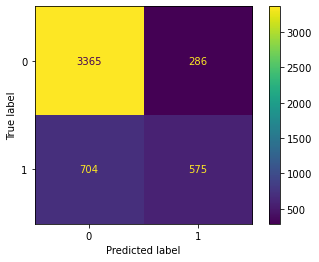



Confusion matrix for the test set
[[1396  127]
 [ 352  238]]


C:\ProgramData\Anaconda3\envs\DA_Env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


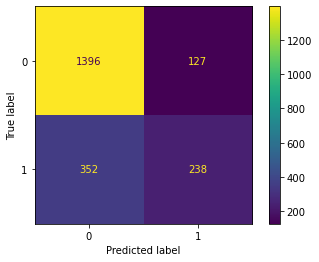

In [95]:
log = LogisticRegression() 


trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

In [96]:
# def split_scale(df,y_column):
#     ''' Input: df
#         Output: X_train_scaled, X_test_scaled, y_train, y_test as tuple
#         Enter via split_scale(df)[i]'''
#     df = df._get_numeric_data()
#     X = df.drop(y_column,axis=1)
#     y = df[y_column]
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=123)
#     std_scaler=StandardScaler().fit(X_train) 
#     X_train_scaled=std_scaler.transform(X_train)
#     X_test_scaled=std_scaler.transform(X_test)
#     X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train.columns)
#     return X_train_scaled, X_test_scaled, y_train, y_test

# def apply_model(X_train, X_test, y_train, y_test, constant=True):
#     if constant == True:
#         X_train = sm.add_constant(X_train) # adding a constant
#         X_test = sm.add_constant(X_test) # adding a constant
#     model = sm.OLS(y_train, X_train).fit()
#     predictions_train = model.predict(X_train)  
#     predictions_test = model.predict(X_test) 
#     print_model = model.summary()
#     print(print_model)
#     return predictions_train, predictions_test, y_train, y_test, model

# def plot_model(predictions_train, predictions_test, y_train, y_test):
#     # Make an scatter plot y_pred vs y
#     # What kind of plot you will get if all the all the predictions are ok?
#     # A stright line

#     fig, ax = plt.subplots(2,2,figsize=(10,10))
#     ax[0,0].plot(predictions_test, y_test, 'o',color='#2499be')
#     ax[0,0].set_xlabel("y_test")
#     ax[0,0].set_ylabel("y_pred")
#     ax[0,0].set_title("Test Set -Predicted vs real")

#     # Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
#     # It resembles a normal distribution?
#     ax[0,1].hist(y_test - predictions_test,color='#2499be')
#     ax[0,1].set_xlabel("Test y-y_pred")
#     ax[0,1].set_title("Test Set Residual histogram")

#     ax[1,0].plot(predictions_train, y_train, 'o',color='#2499be')
#     ax[1,0].set_xlabel("y_train")
#     ax[1,0].set_ylabel("y_pred_train")
#     ax[1,0].set_title("Train set Predicted vs real")

#     # Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
#     # It resembles a normal distribution?
#     ax[1,1].hist(y_train -predictions_train,color='#2499be')
#     ax[1,1].set_xlabel("Train y-y_pred")
#     ax[1,1].set_title("Train Residual histogram")
#     return
# def model_df(df,y_column,constant = True):
#     df_scaled = split_scale(df,y_column)
#     model = apply_model(df_scaled[0],df_scaled[1],df_scaled[2],df_scaled[3],constant)
#     plot_model(model[0],model[1],model[2],model[3])
#     return model[4]

### Decision Tree

In [97]:
def score_classifier(X,y,model):
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30,random_state=123)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_train_pred),
                                         precision_score(y_train, y_train_pred),
                                         recall_score(y_train, y_train_pred)],
                               'Test': [accuracy_score(y_test, y_test_pred),
                                        precision_score(y_test, y_test_pred),
                                        recall_score(y_test, y_test_pred)]})

    display(performance_log)

    print("Confusion matrix for the train set")
    print(confusion_matrix(y_train,y_train_pred))
    #(model,X_train,y_train, values_format = 'd')
    ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
    plt.show()

    print()
    print()

    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_test_pred))
    #plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
    ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
    plt.show()
    return model

,Error_metric,Train,Test
0,Accuracy,0.791684,0.766682
1,Precision,0.656716,0.635097
2,Recall,0.412823,0.386441


Confusion matrix for the train set
[[3375  276]
 [ 751  528]]


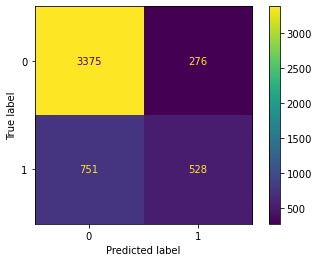



Confusion matrix for the test set
[[1392  131]
 [ 362  228]]


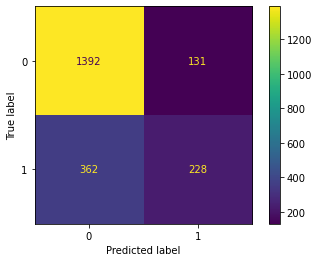

In [98]:
dt = score_classifier(X,y,DecisionTreeClassifier(max_depth =10,min_samples_leaf=400))

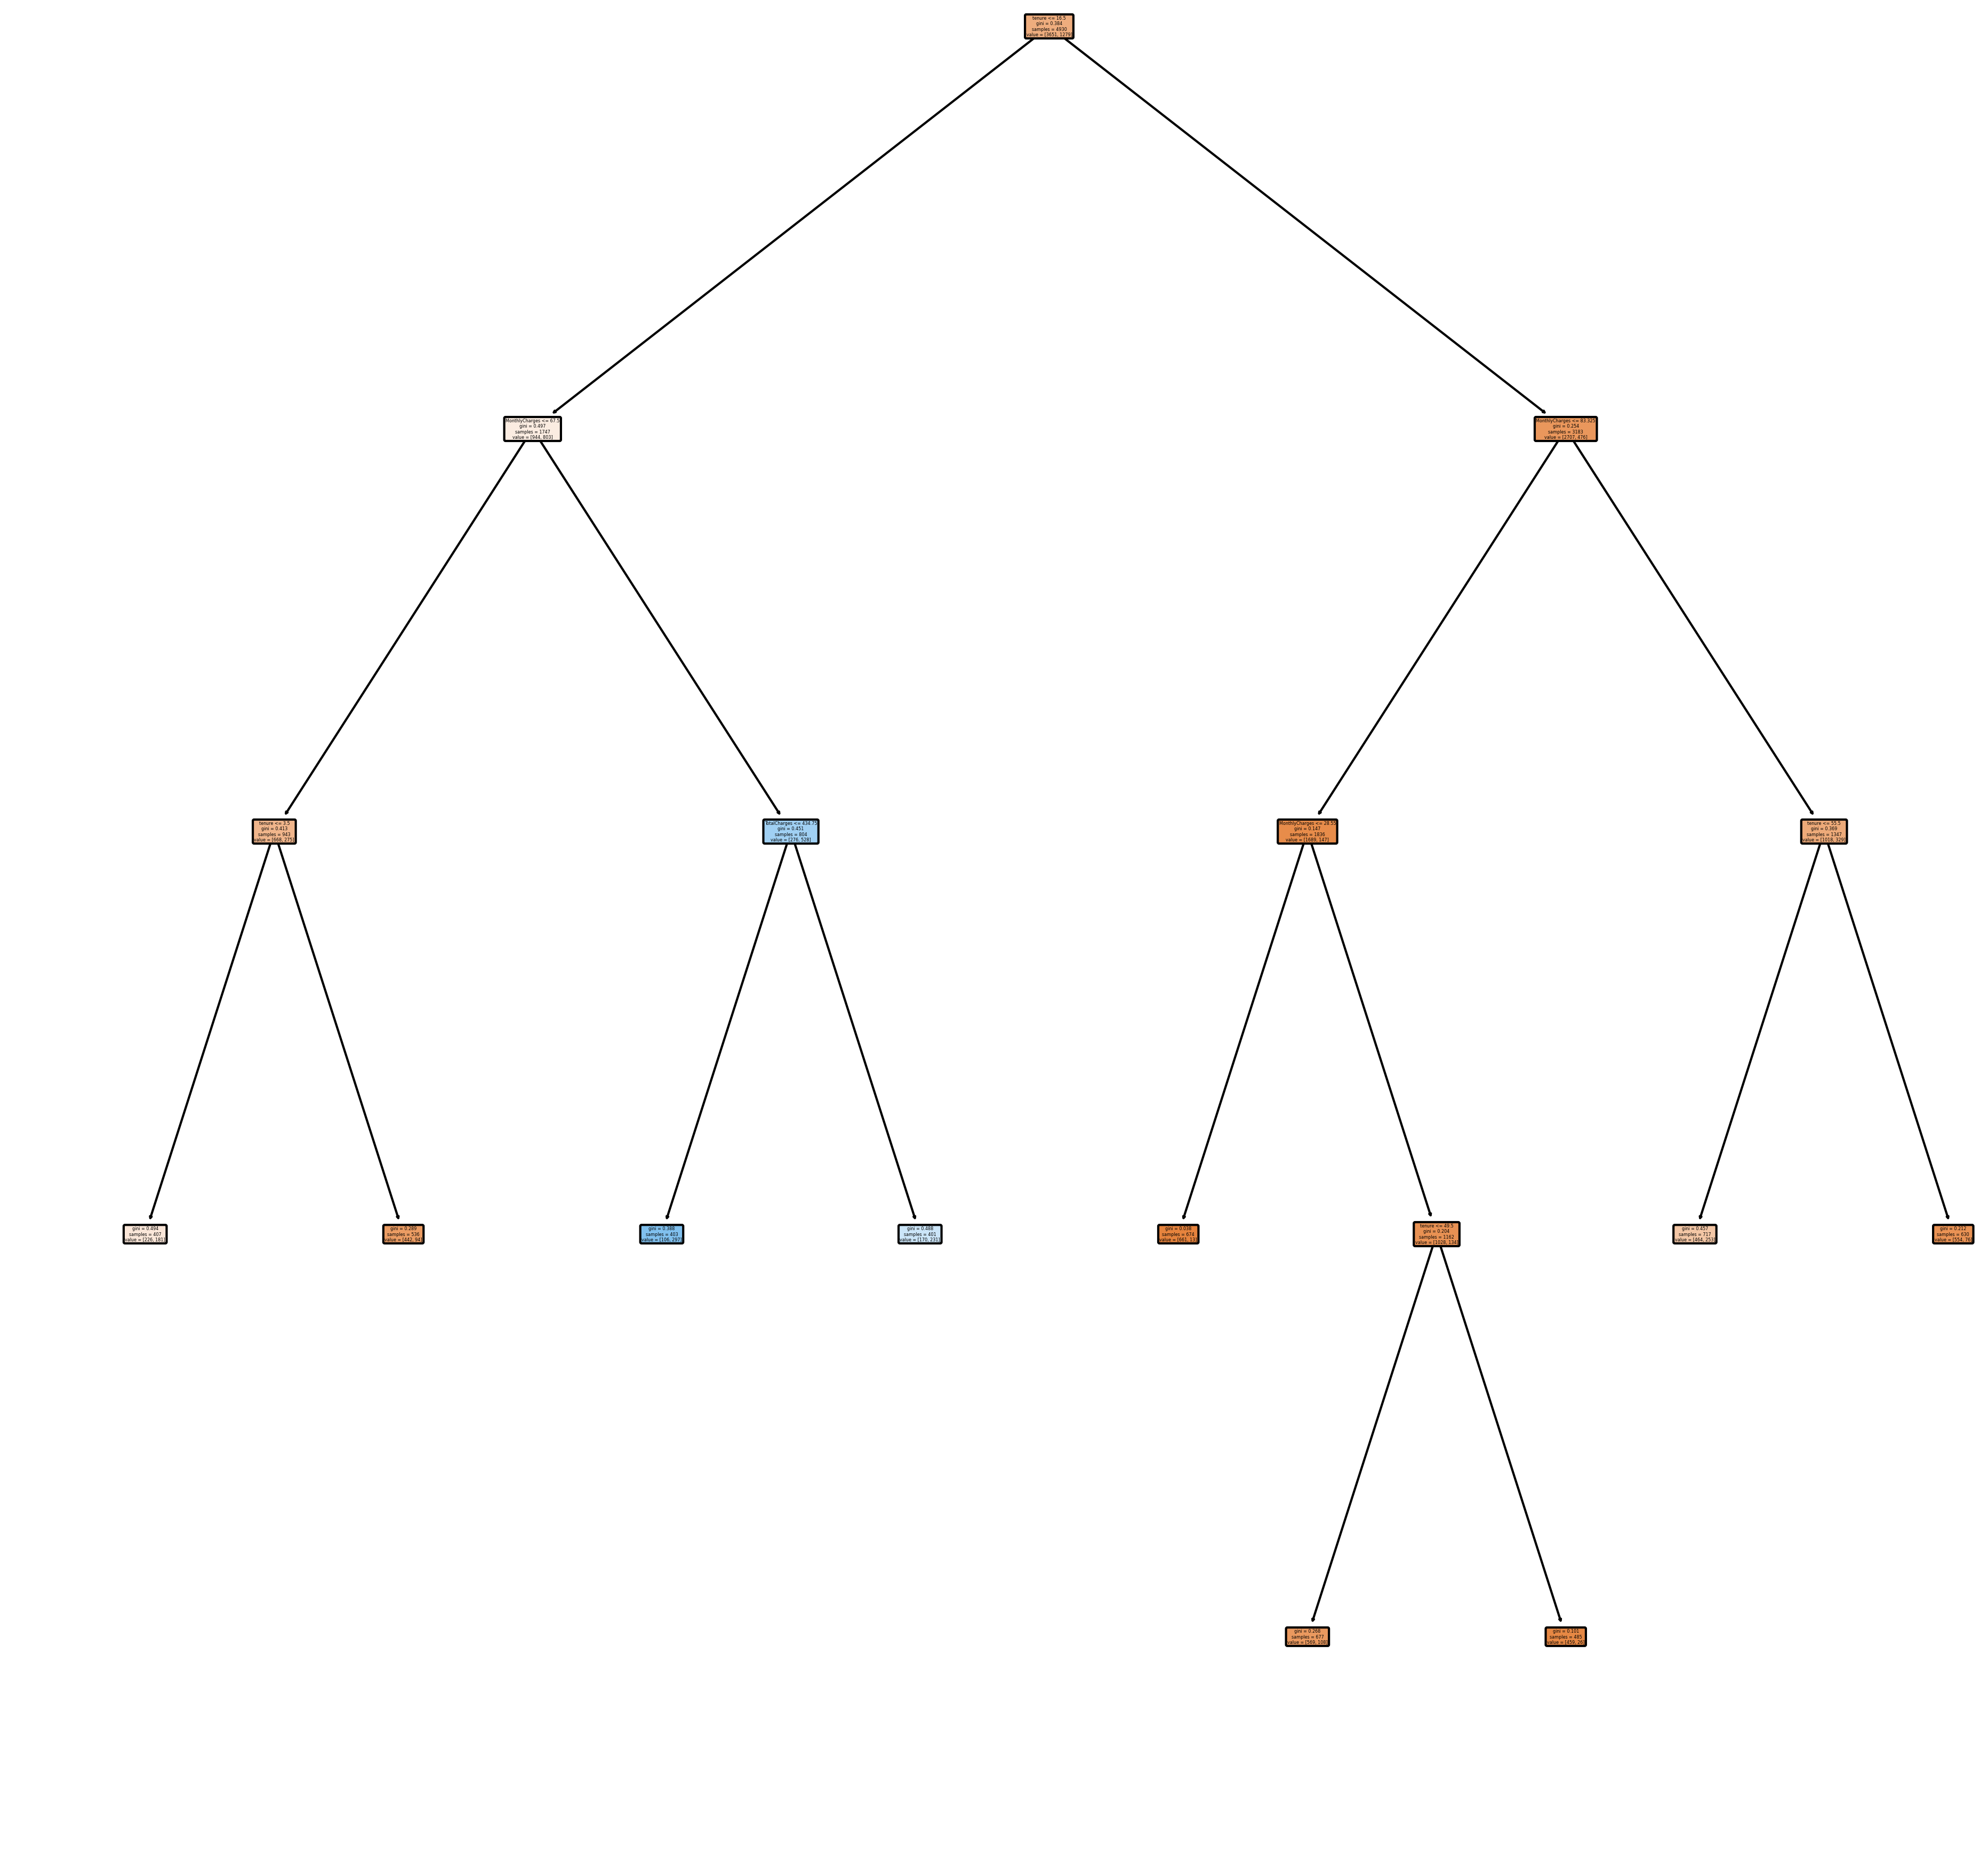

In [99]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [100]:
def model_classifier(X,y,model,transformer=None):
    from sklearn.model_selection import train_test_split


    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30,random_state=123)
    if transformer != None:
        if transformer == 'PowerTransformer':
            from sklearn.preprocessing import PowerTransformer
            trans = PowerTransformer()
        elif transformer == 'StandardScaler':
            from sklearn.preprocessing import StandardScaler
            trans = StandardScaler()
        trans.fit(X_train)

        X_train = trans.transform(X_train)
        X_test  = trans.transform(X_test)
        
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_train_pred),
                                         precision_score(y_train, y_train_pred),
                                         recall_score(y_train, y_train_pred)],
                               'Test': [accuracy_score(y_test, y_test_pred),
                                        precision_score(y_test, y_test_pred),
                                        recall_score(y_test, y_test_pred)]})

    display(performance_log)

    # print("Confusion matrix for the train set")
    # print(confusion_matrix(y_train,y_train_pred))
    # #(model,X_train,y_train, values_format = 'd')
    # ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
    # plt.show()

    # print()
    # print()

    # print("Confusion matrix for the test set")
    # print(confusion_matrix(y_test, y_test_pred))
    # #plot_confusion_matrix(model,X_test,y_test, values_format = 'd')
    # ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
    # plt.show()
    return model, X_train, y_train


    apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.


In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [102]:
log = LogisticRegression()
df = DecisionTreeClassifier(max_depth=12)
knn = KNeighborsClassifier(n_neighbors=25)

model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores_compare = {}
i=0

for model in [log,df,knn]:
    print(model)
    out = model_classifier(X,y,model)
    scores=cross_val_score(out[0],out[1],out[2], cv=10)
    scores_compare[model_names[i]] = scores.mean()
    i = i+1
    print(model,"has an %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    print('----------------------------------------------------------------------------------------')
    print('----------------------------------------------------------------------------------------')
print(scores_compare)


LogisticRegression()


,Error_metric,Train,Test
0,Accuracy,0.787627,0.761950
1,Precision,0.601045,0.585799
2,Recall,0.539484,0.503390


C:\ProgramData\Anaconda3\envs\DA_Env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() has an 0.80 accuracy with a standard deviation of 0.02
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=12)


,Error_metric,Train,Test
0,Accuracy,0.906897,0.725982
1,Precision,0.872051,0.511983
2,Recall,0.751368,0.398305


DecisionTreeClassifier(max_depth=12) has an 0.75 accuracy with a standard deviation of 0.02
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=25)


,Error_metric,Train,Test
0,Accuracy,0.802028,0.770469
1,Precision,0.698558,0.665615
2,Recall,0.416732,0.357627


KNeighborsClassifier(n_neighbors=25) has an 0.79 accuracy with a standard deviation of 0.01
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
{'Regression Tree': 0.7961460446247465, 'Linear Regression': 0.7494929006085193, 'KNN': 0.7888438133874239}



Managing imbalance in the dataset



    Check for the imbalance.


In [103]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [104]:
len(y[y==1])/len(y)

0.2653698707936959

    Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.


In [105]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [106]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

    Each time fit the model and see how the accuracy of the model is.


In [107]:
log = LogisticRegression()
df = DecisionTreeClassifier(max_depth=4)
knn = KNeighborsClassifier(n_neighbors=25)

model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores_compare = {}
i=0

for model in [log,df,knn]:
    print(model)
    out = model_classifier(X_sm,y_sm,model)
    scores=cross_val_score(out[0],out[1],out[2], cv=5)
    scores_compare[model_names[i]] = scores.mean()
    i = i+1
    print(model,"has an %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    print('----------------------------------------------------------------------------------------')
    print('----------------------------------------------------------------------------------------')
print(scores_compare)

LogisticRegression()


,Error_metric,Train,Test
0,Accuracy,0.737816,0.737842
1,Precision,0.713479,0.703266
2,Recall,0.798791,0.813151


LogisticRegression() has an 0.74 accuracy with a standard deviation of 0.01
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=4)


,Error_metric,Train,Test
0,Accuracy,0.755764,0.756844
1,Precision,0.759511,0.751773
2,Recall,0.751787,0.759115


DecisionTreeClassifier(max_depth=4) has an 0.75 accuracy with a standard deviation of 0.01
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=25)


,Error_metric,Train,Test
0,Accuracy,0.764324,0.742995
1,Precision,0.747501,0.722022
2,Recall,0.801539,0.781250


KNeighborsClassifier(n_neighbors=25) has an 0.73 accuracy with a standard deviation of 0.01
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
{'Regression Tree': 0.7357457419672169, 'Linear Regression': 0.746238594725263, 'KNN': 0.7336737281188398}


In [115]:
X1 = X.copy()
y1 = y.copy() 
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [118]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
for i in range(4):
    X1, y1 = tl.fit_resample(X1, y1)
    
y1.value_counts()

C:\ProgramData\Anaconda3\envs\DA_Env\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


0    4394
1    1869
Name: Churn, dtype: int64

In [110]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

C:\ProgramData\Anaconda3\envs\DA_Env\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


0    4620
1    1869
Name: Churn, dtype: int64

In [123]:
log = LogisticRegression()
df = DecisionTreeClassifier(max_depth=4)
knn = KNeighborsClassifier(n_neighbors=25)

model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores_compare = {}
i=0

for model in [log,df,knn]:
    print(model)
    out = model_classifier(X1,y1,model)
    scores=cross_val_score(out[0],out[1],out[2], cv=50)
    scores_compare[model_names[i]] = scores.mean()
    i = i+1
    print(model,"has an %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    print('----------------------------------------------------------------------------------------')
    print('----------------------------------------------------------------------------------------')
print(scores_compare)

LogisticRegression()


,Error_metric,Train,Test
0,Accuracy,0.798814,0.780734
1,Precision,0.692532,0.703196
2,Recall,0.558249,0.522034


C:\ProgramData\Anaconda3\envs\DA_Env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() has an 0.80 accuracy with a standard deviation of 0.03
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=4)


,Error_metric,Train,Test
0,Accuracy,0.809763,0.792975
1,Precision,0.730570,0.738717
2,Recall,0.551212,0.527119


DecisionTreeClassifier(max_depth=4) has an 0.80 accuracy with a standard deviation of 0.03
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=25)


,Error_metric,Train,Test
0,Accuracy,0.804516,0.784460
1,Precision,0.748821,0.757660
2,Recall,0.496482,0.461017


KNeighborsClassifier(n_neighbors=25) has an 0.79 accuracy with a standard deviation of 0.03
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
{'Regression Tree': 0.7981609195402298, 'Linear Regression': 0.7958855799373039, 'KNN': 0.789926854754441}
